In [ ]:
# This is jupyter notebook

# Importing necessary python liberaries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
df = pd.read_csv("crop_yield.csv")

In [58]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,11.209317,10.945688,2051.4,15.764969,10.038164,0.796087
1,Arhar/Tur,1997,Kharif,Assam,8.800566,8.452335,2051.4,13.356082,7.629718,0.710435
2,Castor seed,1997,Kharif,Assam,6.680855,3.135494,2051.4,11.235277,5.512461,0.238333
3,Coconut,1997,Whole Year,Assam,9.886189,18.658949,2051.4,14.441803,8.715119,5.072222
4,Cotton(lint),1997,Kharif,Assam,7.461640,6.678342,2051.4,12.016736,6.291736,0.420909


# Checking shape and zize of dataset

In [57]:
print(df.shape)
print(df.size)

(19689, 10)
196890


# Identifying missing values

In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

# Identifying incorrect datatypes

In [5]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

# Identifying duplicated data

In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()]

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield


# Identifing Outliers

In [19]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


### 1. Using Boxplot method

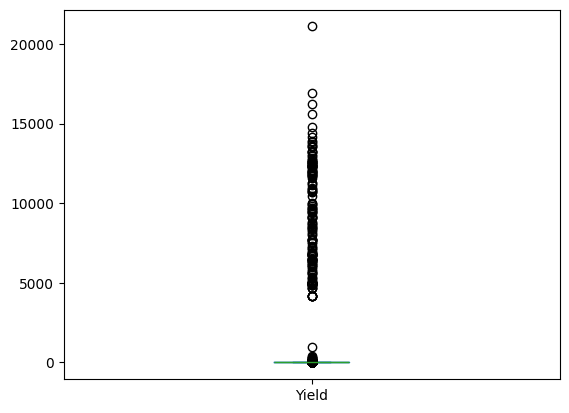

In [28]:
df["Yield"].plot(kind="box")
plt.show()

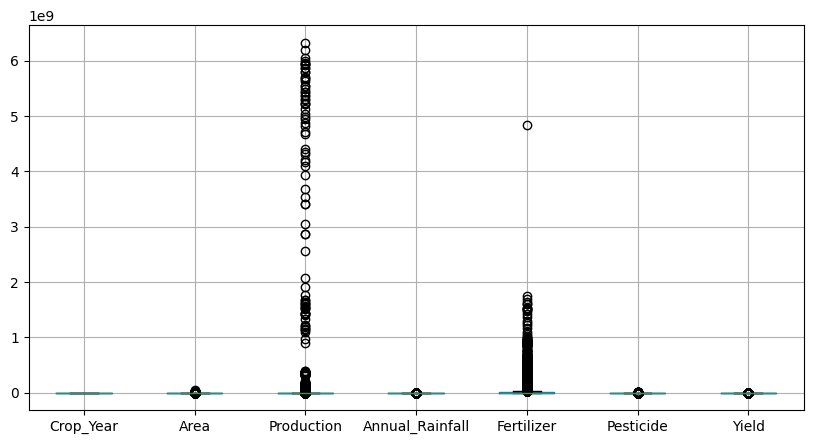

In [21]:
df.boxplot(figsize=(10,5))
plt.show()

### 2. Using z-score method


In [29]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include="number")))
outliers = df[(z_scores > 3).any(axis=1)]
outliers

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1.870662e+06,6093.36,5238.051739
60,Coconut,1997,Whole Year,Kerala,884344.0,5210000000,3252.4,8.416302e+07,274146.64,5376.054286
94,Coconut,1997,Whole Year,West Bengal,24273.0,306202300,1852.9,2.310061e+06,7524.63,13003.787780
110,Niger seed,1997,Rabi,West Bengal,50808100.0,38657300,1852.9,4.835407e+09,15750511.00,0.698889
118,Rice,1997,Winter,West Bengal,4270328.0,8915100,1852.9,4.064071e+08,1323801.68,1.985556
...,...,...,...,...,...,...,...,...,...,...
19557,Rice,2014,Winter,Odisha,3282000.0,7802000,1536.9,4.954507e+08,1083060.00,2.379333
19585,Rice,2015,Winter,Odisha,3167000.0,4702000,1210.1,5.001010e+08,1045110.00,1.417667
19614,Rice,2016,Winter,Odisha,3226450.0,8343100,1460.5,4.944535e+08,1129257.50,2.543000
19643,Rice,2017,Winter,Odisha,3014130.0,5279130,1344.4,4.745446e+08,1145369.40,1.747000


### 3. Using IQR method

In [34]:
numeric_cols = df.select_dtypes(include="number")

outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)]

print(outliers[col])

            Crop  Crop_Year       Season      State      Area  Production  \
3       Coconut        1997  Whole Year       Assam   19656.0   126905000   
7           Jute       1997  Kharif           Assam   94520.0      904095   
14        Potato       1997  Whole Year       Assam   75259.0      671871   
21     Sugarcane       1997  Kharif           Assam   31318.0     1287451   
54     Sugarcane       1997  Whole Year   Karnataka  308857.0    28999269   
...          ...        ...          ...        ...       ...         ...   
19618  Sugarcane       2016  Winter          Odisha    5493.0      344294   
19636     Potato       2017  Winter          Odisha    3966.0       41812   
19647  Sugarcane       2017  Winter          Odisha    3713.0      240245   
19665     Potato       2018  Winter          Odisha    4900.0       54455   
19676  Sugarcane       2018  Winter          Odisha    6778.0      417672   

       Annual_Rainfall   Fertilizer  Pesticide        Yield  
3            

# Handling Outliers
### 1. Using log transformation

In [37]:
df["Production"] = np.log1p(df["Production"])
df["Fertilizer"] = np.log1p(df["Fertilizer"])
df["Area"] = np.log1p(df["Area"])

### 2. Using IQR capping

In [43]:
Q1 = df["Pesticide"].quantile(0.25)
Q3 = df["Pesticide"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Pesticide"] = df["Pesticide"].clip(lower_bound, upper_bound)

In [45]:
Q1 = df["Yield"].quantile(0.25)
Q3 = df["Yield"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df["Yield"] = df["Yield"].clip(lower_bound,upper_bound)

# Checking skewness in the data

In [46]:
df.skew(numeric_only = True)

Crop_Year         -0.162656
Area              -0.340852
Production         0.003418
Annual_Rainfall    2.131785
Fertilizer        -0.383779
Pesticide         -0.257430
Yield              1.134575
dtype: float64

In [49]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,11.209317,10.945688,2051.4,15.764969,10.038164,0.796087
1,Arhar/Tur,1997,Kharif,Assam,8.800566,8.452335,2051.4,13.356082,7.629718,0.710435
2,Castor seed,1997,Kharif,Assam,6.680855,3.135494,2051.4,11.235277,5.512461,0.238333
3,Coconut,1997,Whole Year,Assam,9.886189,18.658949,2051.4,14.441803,8.715119,5.072222
4,Cotton(lint),1997,Kharif,Assam,7.461640,6.678342,2051.4,12.016736,6.291736,0.420909


# EDA (Exporatory Data Analysis)

## Correlation insights

In [139]:
num_col = df.select_dtypes(include = "number")
num_col.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.106848,-0.066105,-0.011187,-0.045523,-0.058810,0.063976
Area,-0.106848,1.000000,0.894875,-0.207886,0.997521,0.993572,0.052752
Production,-0.066105,0.894875,1.000000,-0.148167,0.894139,0.891134,0.427950
Annual_Rainfall,-0.011187,-0.207886,-0.148167,1.000000,-0.208513,-0.206394,0.055073
Fertilizer,-0.045523,0.997521,0.894139,-0.208513,1.000000,0.992411,0.056149
Pesticide,-0.058810,0.993572,0.891134,-0.206394,0.992411,1.000000,0.056956
Yield,0.063976,0.052752,0.427950,0.055073,0.056149,0.056956,1.000000


<Axes: >

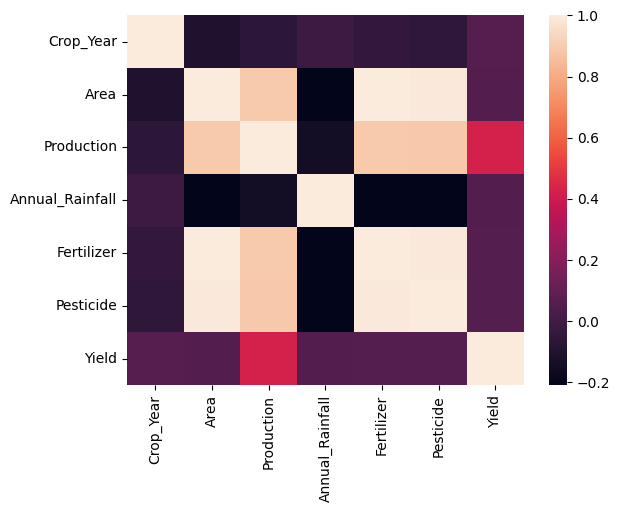

In [140]:
sns.heatmap(num_col.corr())

## Crop wise yield analysis

### Average Yield per Crop

In [73]:
crop_yield_avg = df.groupby("Crop")["Yield"].mean().sort_values(ascending = False)
crop_yield_avg

Crop
Banana                   5.030816
Potato                   4.999328
Tapioca                  4.954342
Coconut                  4.851392
Sugarcane                4.790234
Sweet potato             4.648649
Onion                    4.527079
Jute                     3.942178
Mesta                    3.788942
Ginger                   3.528965
Garlic                   3.347397
Turmeric                 2.618879
Maize                    2.247685
Rice                     2.215173
Wheat                    2.005086
Tobacco                  1.812110
Oilseeds total           1.788548
Dry chillies             1.755611
Arecanut                 1.724488
Cotton(lint)             1.604690
Barley                   1.595540
Bajra                    1.366532
Groundnut                1.360983
Sannhamp                 1.245473
Peas & beans (Pulses)    1.224927
Ragi                     1.215408
Soyabean                 1.083194
Jowar                    1.072498
other oilseeds           1.044610
Sunflower

### Crop-wise Yield Statistics

In [75]:
crop_yield_stats = df.groupby("Crop")["Yield"].agg(
    Avg_Yield="mean",
    Max_Yield="max",
    Min_Yield="min",
    Std_Deviation="std"
).sort_values("Std_Deviation", ascending=False)

crop_yield_stats

,Avg_Yield,Max_Yield,Min_Yield,Std_Deviation
Crop,,,,
Jute,3.942178,5.072222,0.000000,1.836908
Turmeric,2.618879,5.072222,0.000000,1.745857
Garlic,3.347397,5.072222,0.000000,1.737711
Ginger,3.528965,5.072222,0.000000,1.707779
Mesta,3.788942,5.072222,0.000000,1.676861
Sannhamp,1.245473,5.072222,0.000000,1.665130
Tobacco,1.812110,5.072222,0.000000,1.460467
Dry chillies,1.755611,5.072222,0.205000,1.420660
Oilseeds total,1.788548,5.072222,0.932500,1.402073


## State wise producion analysis

### Total Production per State

In [77]:
state_production = df.groupby("State")["Production"].sum().sort_values(ascending = False)
state_production

State
Karnataka            15546.224089
Andhra Pradesh       13376.794363
West Bengal          10576.539099
Gujarat               9686.034721
Uttar Pradesh         9371.074454
Madhya Pradesh        9366.677046
Bihar                 9265.201717
Tamil Nadu            8898.884456
Maharashtra           8889.863477
Assam                 7599.154305
Chhattisgarh          7586.220615
Odisha                7262.055338
Haryana               6079.256363
Uttarakhand           5921.235260
Nagaland              5705.329582
Meghalaya             5515.772293
Kerala                4940.325354
Himachal Pradesh      4507.566984
Punjab                4078.203964
Jammu and Kashmir     3915.815303
Manipur               3581.841530
Telangana             3561.320171
Puducherry            3383.358597
Tripura               3308.472354
Jharkhand             2783.160047
Mizoram               2761.156648
Arunachal Pradesh     2716.431186
Goa                   2220.202646
Sikkim                1876.841732
Delhi   

### Average Production per State

In [78]:
state_production_avg = df.groupby("State")["Production"].mean().sort_values(ascending = False)
state_production_avg

State
Gujarat              11.855612
Maharashtra          11.545277
Uttar Pradesh        11.358878
Madhya Pradesh       11.084825
Karnataka            10.856302
Tamil Nadu           10.825893
Andhra Pradesh       10.566188
Assam                10.395560
Bihar                10.340627
Jharkhand            10.308000
Punjab               10.272554
West Bengal           9.667769
Haryana               9.634321
Odisha                9.555336
Arunachal Pradesh     9.302847
Kerala                9.251546
Goa                   9.025214
Telangana             8.970580
Meghalaya             8.498879
Sikkim                8.304609
Chhattisgarh          8.290951
Nagaland              8.280594
Manipur               8.067211
Uttarakhand           7.750308
Tripura               7.502205
Himachal Pradesh      7.317479
Delhi                 7.025888
Mizoram               6.637396
Jammu and Kashmir     6.205729
Puducherry            5.049789
Name: Production, dtype: float64

### Top 10 States by Total Production

In [81]:
top_10_states=state_production.head(10)
top_10_states

State
Karnataka         15546.224089
Andhra Pradesh    13376.794363
West Bengal       10576.539099
Gujarat            9686.034721
Uttar Pradesh      9371.074454
Madhya Pradesh     9366.677046
Bihar              9265.201717
Tamil Nadu         8898.884456
Maharashtra        8889.863477
Assam              7599.154305
Name: Production, dtype: float64

## Year wise analysis

### Year-wise Total Production

In [89]:
year_production = df.groupby("Crop_Year")["Production"].sum().reset_index().sort_values("Crop_Year")
year_production

,Crop_Year,Production
0,1997,4219.553935
1,1998,6321.590454
2,1999,6542.245112
3,2000,7428.045727
4,2001,7218.632454
5,2002,7766.204461
6,2003,7773.500882
7,2004,7633.480839
8,2005,7716.283973
9,2006,7854.674941


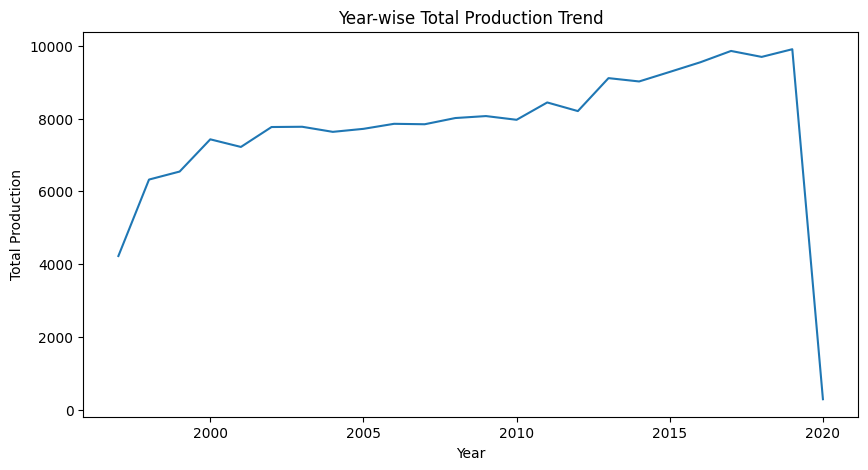

In [90]:
plt.figure(figsize=(10,5))
plt.plot(year_production["Crop_Year"], year_production["Production"])
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Year-wise Total Production Trend")
plt.show()

### Year-wise Average Yield Trend

In [92]:
year_yield_avg = df.groupby("Crop_Year")["Yield"].mean().reset_index().sort_values("Crop_Year")
year_yield_avg

,Crop_Year,Yield
0,1997,1.562372
1,1998,1.725275
2,1999,1.707434
3,2000,1.614543
4,2001,1.613396
5,2002,1.623080
6,2003,1.695892
7,2004,1.678658
8,2005,1.713691
9,2006,1.695833


### Year wise cultivated area

In [95]:
year_area = (
    df.groupby("Crop_Year")["Area"]
    .sum()
    .reset_index()
    .sort_values("Area", ascending =False)
)
year_area

,Crop_Year,Area
22,2019,9366.448348
20,2017,9347.845733
21,2018,9194.776106
19,2016,9080.477219
18,2015,8840.649627
16,2013,8627.784675
17,2014,8545.888288
14,2011,8099.794556
15,2012,7854.155533
12,2009,7792.517034


### Year wise rainfall

In [99]:
year_rainfall = (
    df.groupby("Crop_Year")["Annual_Rainfall"]
    .mean()
    .reset_index()
    .sort_values("Crop_Year")
)
year_rainfall

,Crop_Year,Annual_Rainfall
0,1997,1595.778293
1,1998,1762.342879
2,1999,1590.549135
3,2000,1450.290042
4,2001,1406.769550
5,2002,1276.836457
6,2003,1417.740044
7,2004,1450.049253
8,2005,1462.180610
9,2006,1362.007989


## Season wise analysis

### season wise rainfall

In [120]:
season_rainfall = df.groupby("Season")["Annual_Rainfall"].sum().reset_index().sort_values("Annual_Rainfall", ascending = False)
season_rainfall

,Season,Annual_Rainfall
1,Kharif,1.131835e+07
2,Rabi,7.970757e+06
4,Whole Year,6.078787e+06
3,Summer,1.565900e+06
0,Autumn,7.031759e+05
5,Winter,6.709910e+05


### season wise production

In [116]:
season_production = df.groupby(["Season"])["Production"].sum().reset_index().sort_values("Production", ascending = False)
season_production

,Season,Production
1,Kharif,75225.306923
2,Rabi,52335.579256
4,Whole Year,38410.472189
3,Summer,11072.370994
5,Winter,4382.849251
0,Autumn,4280.690405


### Season wise yield

In [136]:
season_yield = df.groupby("Season")["Yield"].sum()
season_yield

Season
Autumn           571.098584
Kharif         11750.923076
Rabi            8151.279404
Summer          2301.865497
Whole Year     11607.658538
Winter           739.301955
Name: Yield, dtype: float64